In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

sns.set_theme(color_codes=True)

df = pd.read_csv('data/Final_House_Data.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot
0,0,1.0,3,1.0,7,221900.0,1180,0.0,1180,5650
1,2,1.0,2,1.0,6,180000.0,770,0.0,770,10000
2,3,3.0,4,1.0,7,604000.0,1050,910.0,1960,5000
3,4,2.0,3,1.0,8,510000.0,1680,0.0,1680,8080
4,5,4.5,4,1.0,11,1230000.0,3890,1530.0,5420,101930


In [2]:
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=42)

In [4]:
train

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot
11761,2.50,4,2.0,7,530000.0,3020,0.0,3020,6788
11491,2.50,3,2.0,7,571000.0,2510,0.0,2510,5186
5922,1.00,2,1.5,8,575000.0,1310,200.0,1510,4032
12217,1.00,4,1.5,7,500000.0,1440,0.0,1440,7100
7765,1.75,2,1.5,8,825000.0,2050,0.0,2050,4000
...,...,...,...,...,...,...,...,...,...
11284,3.25,5,2.0,9,995000.0,2970,1000.0,3970,8029
11964,4.25,5,2.0,11,1170000.0,4610,0.0,4610,13252
5390,2.00,3,1.0,7,510000.0,1420,0.0,1420,11325
860,1.00,2,1.0,6,340000.0,1090,0.0,1090,6771


In [5]:
test

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot
11275,2.50,3,2.0,7,319950.0,1700,0.0,1700,7000
20500,3.50,4,2.0,8,495000.0,2530,640.0,3170,3858
13696,1.50,2,2.0,7,310000.0,1010,0.0,1010,10005
1475,2.50,5,1.0,8,555000.0,1420,670.0,2090,8712
6355,3.25,4,1.0,10,545000.0,2356,2030.0,4386,12275
...,...,...,...,...,...,...,...,...,...
14,3.00,4,2.0,9,650000.0,1980,970.0,2950,5000
5652,2.50,4,1.0,8,513000.0,1880,780.0,2660,8887
4778,1.00,4,1.5,7,599000.0,1590,0.0,1590,4280
2792,2.25,3,1.0,8,476000.0,1170,400.0,1570,7187


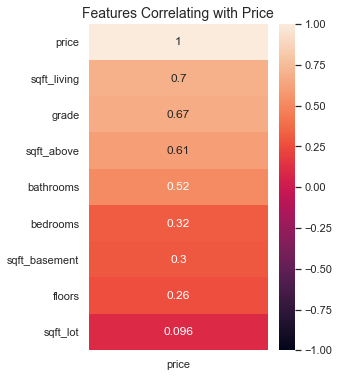

In [6]:
display.Image('Images/Price_corr.png')

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_train = train[['sqft_living', 'grade', 'sqft_above']]
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

In [8]:
X_test = test[['sqft_living', 'grade', 'sqft_above']]
y_test = test['price']

In [9]:
X_train.describe()

,sqft_living,grade,sqft_above
count,13971.000000,13971.000000,13971.000000
mean,2078.248085,7.656145,1795.425310
std,912.942751,1.178977,833.313093
min,410.000000,3.000000,410.000000
25%,1426.000000,7.000000,1190.000000
50%,1914.000000,7.000000,1560.000000
75%,2550.000000,8.000000,2230.000000
max,9890.000000,13.000000,8860.000000


In [10]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

def get_r2_mse(y_tn, y_tt, y_tnp, y_ttp):
    import math
    MSE_train = mean_squared_error(y_tn, y_tnp,)
    MSE_test = mean_squared_error(y_tt, y_ttp)
    
    RMSE_train = math.sqrt(MSE_train)
    RMSE_test = math.sqrt(MSE_test)
    print(f'Train RMSE: {RMSE_train:.3e}, Test RMSE: {RMSE_test:.3e}')
    return

In [12]:
get_r2_mse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 2.393e+05, Test RMSE: 2.374e+05


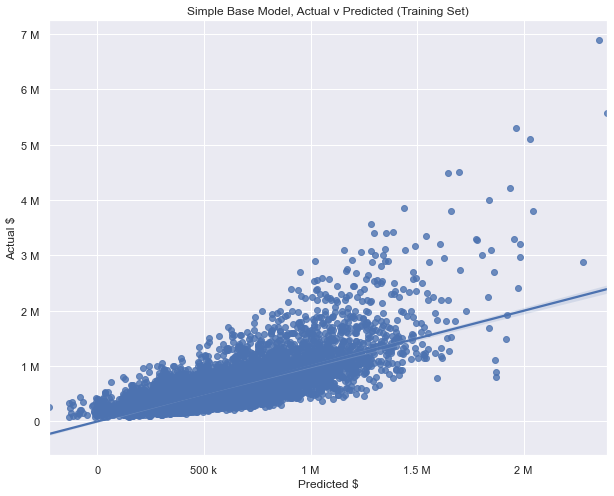

In [13]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train)

plt.title('Simple Base Model, Actual v Predicted (Training Set)')
plt.xlabel('Predicted $'), plt.ylabel('Actual $')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig('Images/Base_Model.png', bbox_inches='tight');

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

def model_qq(formula, data):
    model = ols(formula, data).fit()
    residuals = model.resid
    qq_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
    return qq_plot

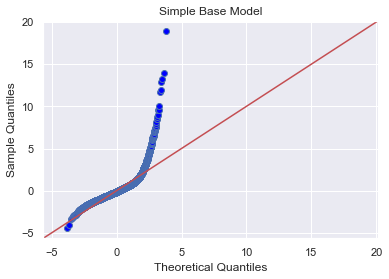

In [15]:
train_simp = X_train.join(y_train)
formula = 'price ~ sqft_living + grade + sqft_above'
model_qq(formula, train_simp)
plt.title('Simple Base Model')
plt.savefig('Images/Base_qqplot.png', bbox_inches='tight');

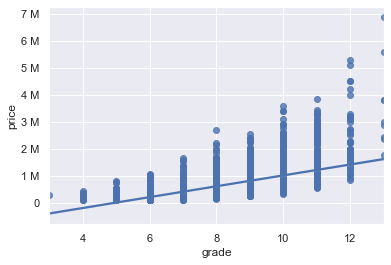

In [16]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

sns.regplot(x = train['grade'], y = train['price'])
ax.yaxis.set_major_formatter(ticker.EngFormatter());

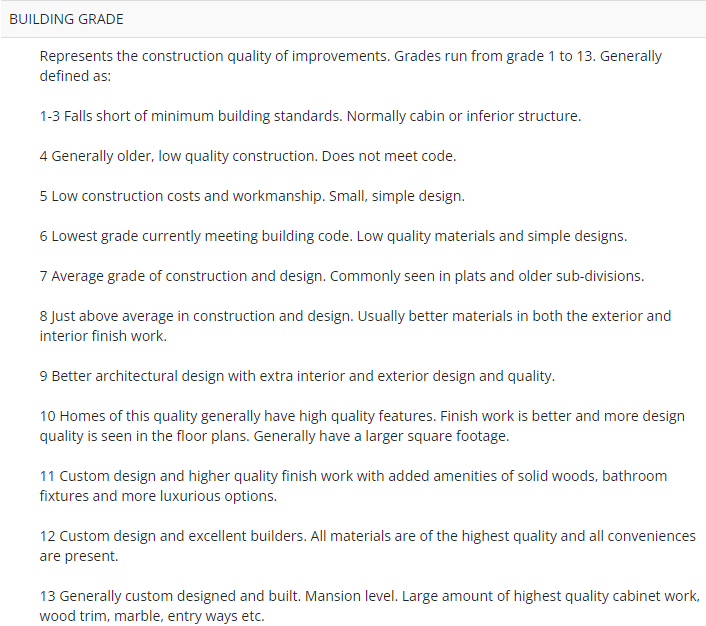

In [17]:
display.Image('Images/kc_building_grades.png')

As shown by the model summary and the qq-plot, the Skew and Kurtosis are quite high.
For the next iteration the dependent variable price will be transformed to manage with this high skew and kurtosis.

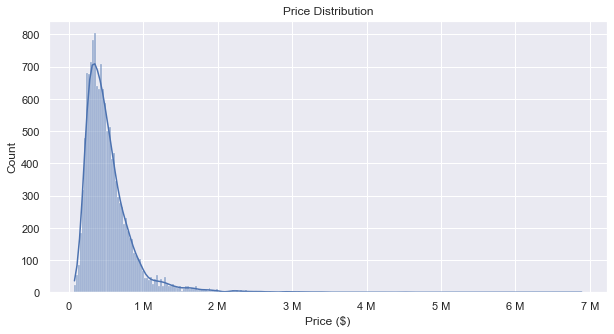

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(train['price'], kde=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Price Distribution'), plt.xlabel('Price ($)')
plt.savefig('Images/Price_Distribution.png', bbox_inches='tight');

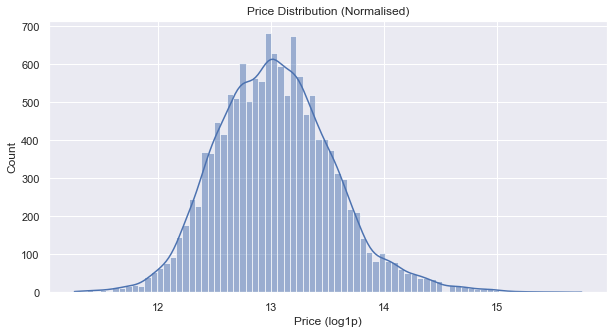

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(np.log(train['price']), kde=True)
plt.title('Price Distribution (Normalised)'), plt.xlabel('Price (log1p)')
plt.savefig('Images/Price_Dist_Normal.png', bbox_inches='tight');

In [20]:
train['price'] = np.log1p(train['price'])
test['price'] = np.log1p(test['price'])

<ipython-input-20-a84dbcb1a8f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price'] = np.log1p(train['price'])
<ipython-input-20-a84dbcb1a8f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price'] = np.log1p(test['price'])


In [21]:
linreg = LinearRegression()
X_train = train[['sqft_living', 'grade', 'sqft_above']]
y_train = train['price']

X_test = test[['sqft_living', 'grade', 'sqft_above']]
y_test = test['price']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [22]:
get_r2_mse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.426e-01, Test RMSE: 3.491e-01


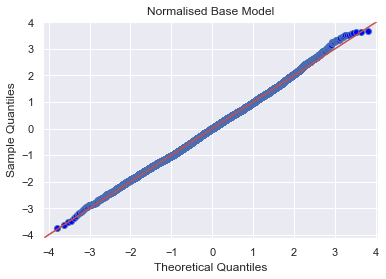

In [23]:
train_simp = X_train.join(y_train)
formula = 'price ~ sqft_living + C(grade) + sqft_above'
model_qq(formula, train_simp)
plt.title('Normalised Base Model')
plt.savefig('Images/Norm_qqplot.png', bbox_inches='tight');

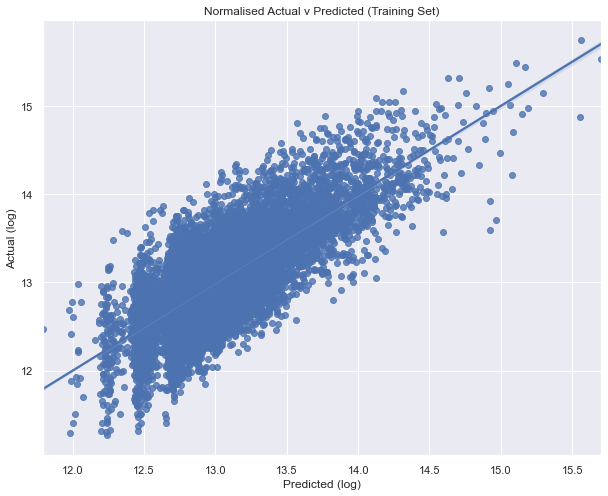

In [24]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train)

plt.title('Normalised Actual v Predicted (Training Set)')
plt.xlabel('Predicted (log)'), plt.ylabel('Actual (log)')
plt.savefig('Images/Price_Transformed_Model.png', bbox_inches='tight');

Wonderful, the RMSE value has decreased dramatically, and the qq-plot and model looks much more normally distributed.  
Now let's build upon this simple base model and add the other features.

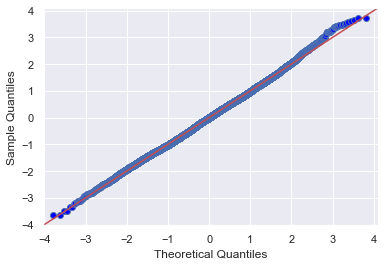

In [25]:
formula = 'price ~ C(grade) + sqft_living + bathrooms + bedrooms + floors + sqft_above + sqft_basement + sqft_lot'
model_qq(formula, train);

In [26]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [27]:
get_r2_mse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.416e-01, Test RMSE: 3.480e-01


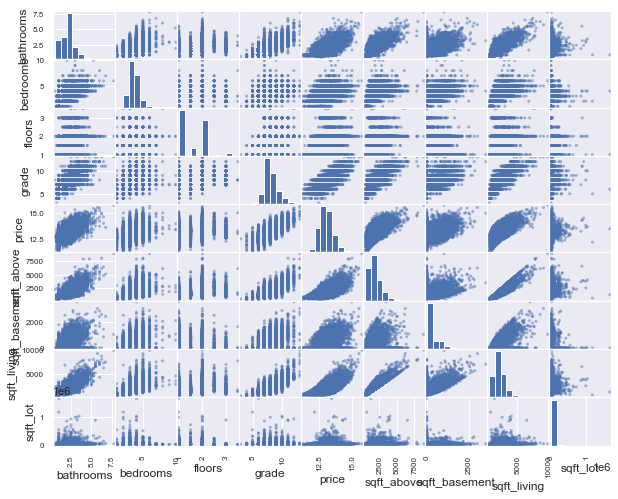

In [28]:
pd.plotting.scatter_matrix(train, figsize=(10, 8))
plt.savefig('Images/Feature_Matrix.png', bbox_inches='tight');

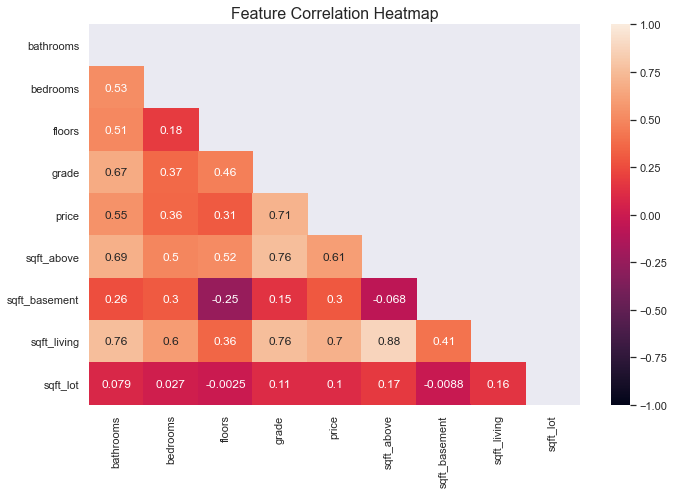

In [29]:
plt.figure(figsize=(11, 7))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlation Heatmap', fontsize=16)
plt.savefig('Images/Feature_corr.png', bbox_inches='tight');

In [30]:
train = train.drop('sqft_above', axis=1)

In [31]:
train[train['sqft_basement'] > 0]

,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_living,sqft_lot
5922,1.00,2,1.5,8,13.262127,200.0,1510,4032
16315,2.50,3,2.5,8,13.203945,320.0,1920,1649
7167,1.50,3,1.0,7,12.487489,290.0,1400,6527
10033,1.75,3,1.0,8,13.527830,920.0,2280,7800
19211,3.25,4,1.0,9,13.122365,1030.0,2670,5001
...,...,...,...,...,...,...,...,...
17568,2.25,3,1.5,6,12.706851,170.0,1340,4080
5311,1.75,4,1.0,6,12.840003,900.0,1800,8385
16850,2.00,3,1.0,7,12.394629,440.0,1310,7349
6265,2.25,3,3.0,8,12.992257,1040.0,3020,6000


In [32]:
train.loc[train['sqft_basement'] > 0, 'sqft_basement'] = 1
train['sqft_basement'] = train['sqft_basement'].astype(bool)

In [33]:
test = test.drop('sqft_above', axis=1)
test.loc[test['sqft_basement'] > 0, 'sqft_basement'] = 1
test['sqft_basement'] = test['sqft_basement'].astype(bool)

In [34]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [35]:
get_r2_mse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.396e-01, Test RMSE: 3.466e-01


It is evident in the same scatter matrix plot that several of the above columns seem to be, inlcuding 'bedrooms' and 'floors'.  
However, this data will not be one-hot encoded, as these columns contain ordinal data, meaning they can still be used as linear regression, as they are simply a count of the variables. Instead, the features will just be wrapped with C( ) within the model formula to let it know that they are still categorical.

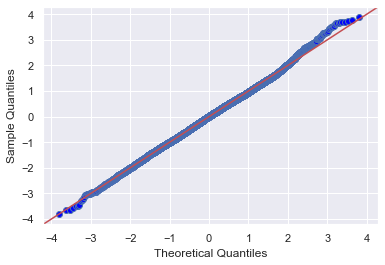

In [36]:
formula = 'price ~ C(grade) + sqft_living + bathrooms + C(bedrooms) + C(sqft_basement) + C(floors) + sqft_lot'
model_qq(formula, train);

For Iteration 4, the distributions of the features will be looked at to manage the slight lifting the model is showing at it's tails.

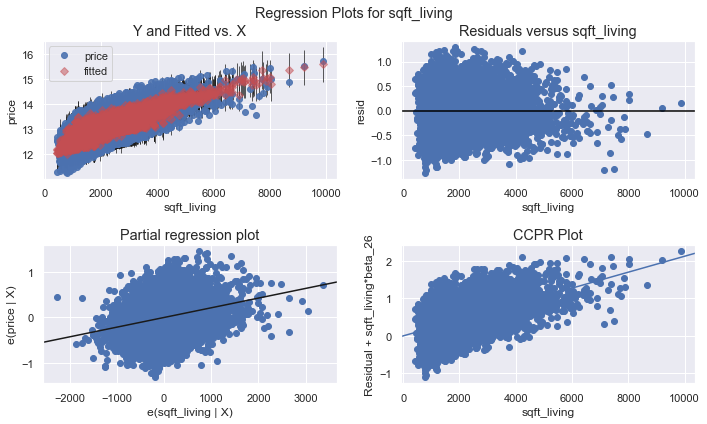

In [37]:
import statsmodels.api as sm
model = ols(formula, train).fit()
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.savefig('Images/Sqft_living_Regression.png', bbox_inches='tight');

In [38]:
def transform(log_cols, data):
    for cols in log_cols:
        data[cols] = np.log1p(data[cols])
        print(cols, 'has been log1p transformed')
    return data.head()

In [39]:
log_cols = ['sqft_living', 'sqft_lot']
transform(log_cols, train)

sqft_living has been log1p transformed
sqft_lot has been log1p transformed


,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_living,sqft_lot
11761,2.50,4,2.0,7,13.180634,False,8.013343,8.823059
11491,2.50,3,2.0,7,13.255146,False,7.828436,8.553911
5922,1.00,2,1.5,8,13.262127,True,7.320527,8.302266
12217,1.00,4,1.5,7,13.122365,False,7.273093,8.867991
7765,1.75,2,1.5,8,13.623140,False,7.626083,8.294300


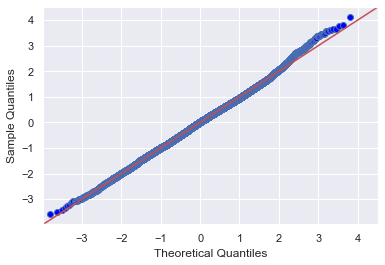

In [40]:
formula = 'price ~ C(grade) + sqft_living + bathrooms + C(bedrooms) + C(sqft_basement) + C(floors) + sqft_lot'
model = ols(formula, train).fit()
model_qq(formula, train);

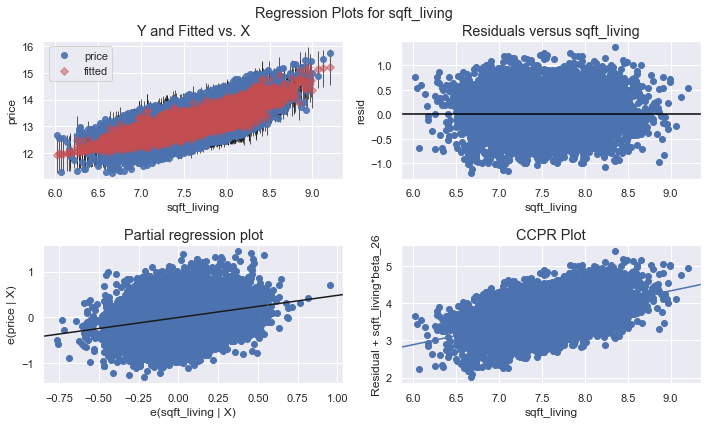

In [41]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.savefig('Images/Sqft_living_Normal_Reg.png', bbox_inches='tight');

In [42]:
transform(log_cols, test)

sqft_living has been log1p transformed
sqft_lot has been log1p transformed


,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_living,sqft_lot
11275,2.50,3,2.0,7,12.675923,False,7.438972,8.853808
20500,3.50,4,2.0,8,13.112315,True,8.061802,8.258163
13696,1.50,2,2.0,7,12.644331,False,6.918695,9.210940
1475,2.50,5,1.0,8,13.226725,True,7.645398,9.072571
6355,3.25,4,1.0,10,13.208543,True,8.386401,9.415401


In [43]:
X_train = train.drop('price', axis=1)
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

In [44]:
X_test = test.drop('price', axis=1)
y_test = test['price']

y_train_preds = linreg.predict(X_train)
y_test_preds = linreg.predict(X_test)

In [45]:
get_r2_mse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.396e-01, Test RMSE: 3.466e-01


In [46]:
from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X_train, y_train.values)

selector.support_

array([False, False, False,  True,  True,  True, False])

In [47]:
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
print(selected_columns)

Index(['grade', 'sqft_basement', 'sqft_living'], dtype='object')


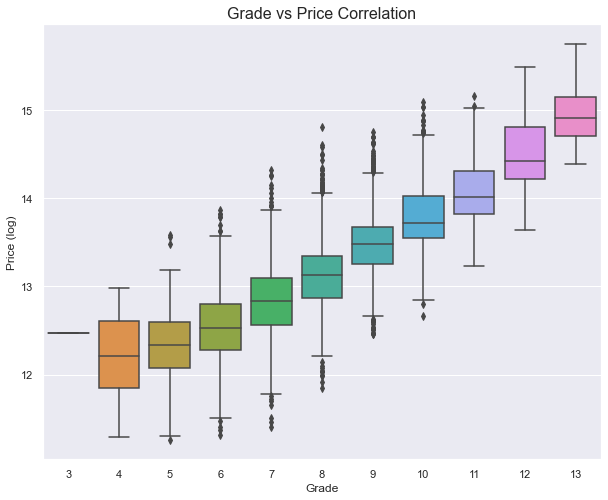

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = train['grade'],y = train['price'])
plt.title('Grade vs Price Correlation', fontsize=16), plt.ylabel('Price (log)'), plt.xlabel('Grade')
plt.savefig('Images/Grade_v_Price_Correlation.png', bbox_inches='tight');

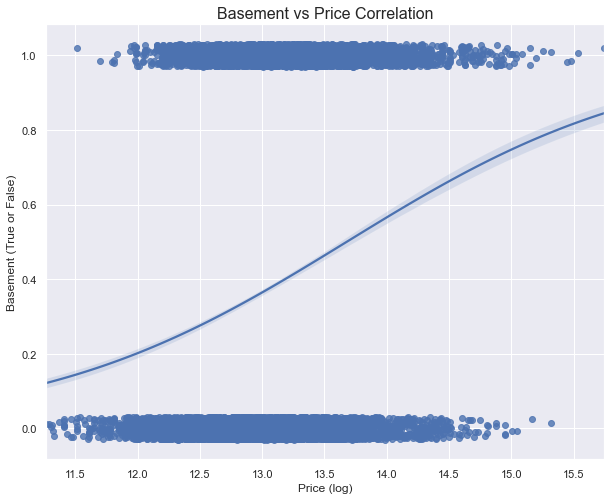

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x = train['price'], y = train['sqft_basement'], logistic=True, y_jitter=.03)
plt.title('Basement vs Price Correlation', fontsize=16), plt.xlabel('Price (log)'), plt.ylabel('Basement (True or False)')
plt.savefig('Images/Basement_v_Price_Correlation.png', bbox_inches='tight');

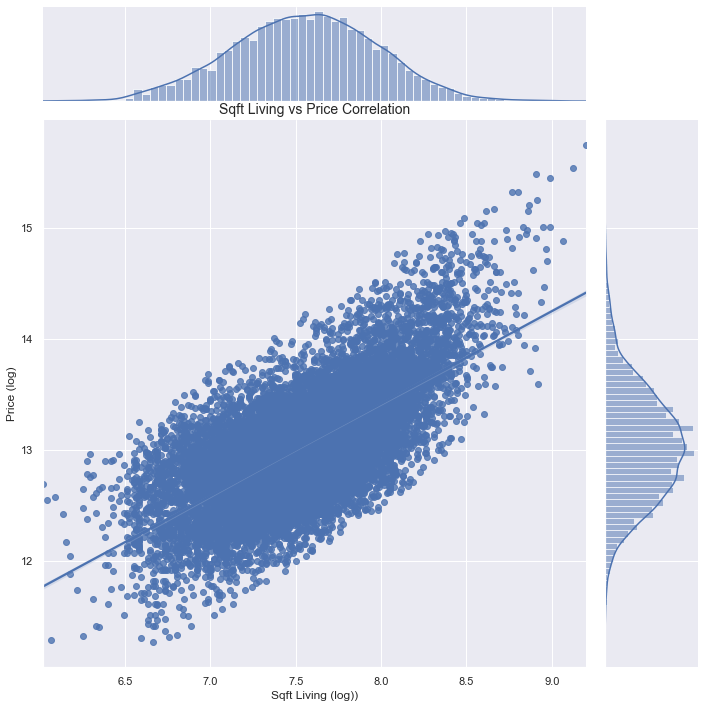

In [59]:
sns.jointplot(x = train['sqft_living'], y = train['price'], kind='reg', height=10)
plt.title('Sqft Living vs Price Correlation', fontsize=14), plt.ylabel('Price (log)'), plt.xlabel('Sqft Living (log))')
plt.savefig('Images/SqftLiving_v_Price_Correlation.png', bbox_inches='tight');

In [60]:
train['sqft_living'] = np.exp(train['sqft_living'])
train['price'] = np.exp(train['price'])

In [62]:
X_train = train[['grade', 'sqft_basement', 'sqft_living']]
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

In [63]:
linreg.coef_

array([103528.74750287,  57889.65019432,    165.06548715])

Approximately for every grade level attained, the house price will increase by roughly \\$ 100,000  
Approximately if the house has a basement, the house price will increase by roughly \\$ 58,000  
Approximately for every 1 sqft of living space added, the house price will increase by \\$ 165